In [2]:
!nrnivmodl /home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod
from neuron import h
from neuron.units import ms, mV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from neuron import clear_gui_callback
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from numpy.linalg import pinv, eig
import numpy as np
from multiprocessing import Pool
font2={'family':'Times New Roman',
'weight':'bold',
'size': 10}

from matplotlib.ticker import FuncFormatter

h.load_file('nrngui.hoc')
h.load_file("import3d.hoc")

morphologyFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/morphologies/cell1.asc"
biophysicalModelFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCbiophys1.hoc"
biophysicalModelTemplateFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCtemplate.hoc"

h.load_file(biophysicalModelFilename)
h.load_file(biophysicalModelTemplateFilename)
def format_func(value, tick_number):
    return f'{value:.0f}'  # 将刻度值格式化为小数点后两位

def plot_curve(ax2,x,y,color='black',title='', linestyle='-',xlim=[0,100],dx=20,ylim=[0,10],dy=5.0, fontsize=10, alpha = 1.0, xlabel='Time/ms', ylabel = 'Frequency/Hz', label='',ynum_decimals =1):
    if color:
        ax2.plot(x,y,color=color,linewidth=2,linestyle=linestyle,alpha=alpha, label=label)
    else:
        ax2.plot(x,y,linewidth=2,alpha=alpha, linestyle=linestyle,label=label)
    ax2.set_xlabel(xlabel,font2)
    ax2.set_ylabel(ylabel,font2)
    
    # def format_funcx(value, tick_number, num_decimals=xnum_decimals):
    #     if num_decimals==0:
    #         return f'{value:.0f}'
    #     return f'{value:.{num_decimals}f}'

    def format_funcy(value, tick_number, num_decimals=ynum_decimals):
        if num_decimals==0:
          return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'


    if dy:
        ax2.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
        ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize, weight='bold')
        ax2.set_ylim([ylim[0], ylim[1]])
        ax2.yaxis.set_major_formatter(FuncFormatter(format_funcy))
        
  
    if xlim:
       ax2.set_xticks(np.arange(xlim[0],xlim[1]+dx,dx))
       ax2.set_xticklabels(np.arange(xlim[0],xlim[1]+dx,dx),fontsize=10,weight='bold')
       ax2.set_xlim(xlim)
    # if ylim:
    #    ax2.set_yticks(np.arange(ylim[0],ylim[1]+dy,dy))
    #    ax2.set_yticklabels(np.arange(ylim[0],ylim[1]+dy,dy),fontsize=10,weight='bold')
    #    ax2.set_ylim(ylim)
    if title:
       ax2.set_title('{0}'.format(title),fontsize=12,weight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if label:
       ax2.legend(loc='best',prop=font2,edgecolor='white')
def exp_fitting(x,y, num=1):
    
    if num==2:
        # Calculate integrals
        iy1 = cumtrapz(y, x, initial=0)
        iy2 = cumtrapz(iy1, x, initial=0)


        # Get exponentials lambdas
        Y = np.column_stack((iy1, iy2,  x**2, x, np.ones_like(x)))
        A = pinv(Y) @ y

        lambdas = eig(np.array([[A[0], A[1]], [1, 0]]))[0]
        # print("Lambdas:", lambdas)

        # Get exponentials multipliers
        X = np.column_stack((np.ones_like(x), np.exp(lambdas[0] * x), np.exp(lambdas[1] * x)))
        P = pinv(X) @ y
        # print("Multipliers:", P)
    
    if num==1:
        iy1 = cumtrapz(y, x, initial=0)

        # Get exponentials lambdas
        Y = np.column_stack((iy1, x, np.ones_like(x)))
        A = pinv(Y) @ y

        lambdas = A[0]
        # print("Lambdas:", lambdas)


        # Get exponentials multipliers
        X = np.column_stack((np.ones_like(x), np.exp(lambdas * x)))
        P = pinv(X) @ y
        # print("Multipliers:", P)
    
    return lambdas, P


/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron
Mod files: "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod//home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/CaDynamics_E2.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod//home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_HVA.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod//home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_LVAst.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod//home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/epsp.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod//home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ih.

# Ih

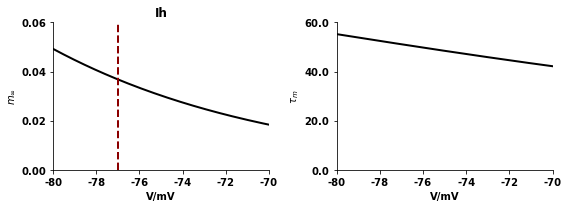

In [95]:
gIhbar = 0.00001
ehcn =  -45.0
# gIh = gIhbar*m
# ihcn = gIh*(v-ehcn)
v=np.linspace(-80,40,1000)
mAlpha =  0.001*6.43*(v+154.9)/(np.exp((v+154.9)/11.9)-1)
mBeta  =  0.001*193*np.exp(v/33.1)
mInf = mAlpha/(mAlpha + mBeta)
mTau = 1/(mAlpha + mBeta)

fig, ax2 = plt.subplots(1,2, figsize = (8,3))
plot_curve(ax2[0], v, mInf, color='black', title='Ih', xlim=[-80,-70],dx=2,ylim=[0,0.06],dy=0.02,alpha = 1.0, xlabel='V/mV', ylabel = r'$m_{\infty}$', label='',ynum_decimals=2)
plot_curve(ax2[1], v, mTau, color='black', title='', xlim=[-80,-70], dx=2, ylim=[0,60], dy=20, alpha = 1.0, xlabel='V/mV', ylabel = r'$\tau_m$', label='')
ax2[0].axvline(x=-77, color='darkred', linestyle='--', linewidth=2)
plt.tight_layout()


In [32]:
L5PC = h.L5PCtemplate(morphologyFilename)
L5PC.dend[58].psection()

{'point_processes': {},
 'density_mechs': {'pas': {'g': [5.35e-05,
    5.35e-05,
    5.35e-05,
    5.35e-05,
    5.35e-05,
    5.35e-05,
    5.35e-05],
   'e': [-90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0],
   'i': [0.0006577789466887652,
    0.0006566852562497547,
    0.0006538712102319072,
    0.0006525337917448653,
    0.0006509750686056305,
    0.0006488819070345524,
    0.000647086024574039]},
  'Ih': {'gIhbar': [0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002],
   'ehcn': [-45.0, -45.0, -45.0, -45.0, -45.0, -45.0, -45.0],
   'ihcn': [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0],
   'gIh': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
   'm': [0.06441722375746596,
    0.0644394353048586,
    0.0644160422346122,
    0.0644040546349629,
    0.06284734812072745,
    0.06312418574993019,
    0.0633679277232413]}},
 'ions': {},
 'morphology': {'L': 124.8770939925151,
  'diam': [0.5799999833106995,
   0.5799999833106995,
   0.5799999833106995,
   0.5799999833106995,
   0.5799999833107,
 

# passive

In [27]:
L5PC = h.L5PCtemplate(morphologyFilename)
passive = False
loc = 58
if passive:
    for sec in h.allsec():
        # 检查 section 是否有主动离子通道
        if h.ismembrane("na3", sec=sec):
            # 将电导设置为0
            sec.gbar_na3 = 0.
        if h.ismembrane("h", sec=sec):
            sec.ghdbar_h = 0.
        if h.ismembrane("kadist", sec=sec):
            sec.gkabar_kadist = 0.
        if h.ismembrane("kaprox", sec=sec):
            sec.gkabar_kaprox = 0.
        if h.ismembrane("kdrca1", sec=sec):
            sec.gkdrbar_kdrca1 = 0.
        if h.ismembrane("nax", sec=sec):
            sec.gbar_nax = 0.
        if h.ismembrane("Ca_HVA",sec=sec):
            sec.gCa_HVAbar_Ca_HVA = 0.
        if h.ismembrane("Ca_LVAst",sec=sec):
            sec.gCa_LVAstbar_Ca_LVAst = 0.
        if h.ismembrane("Ih",sec=sec):
            sec.gIhbar_Ih = 0.
        if h.ismembrane("Im",sec=sec):
            sec.gImbar_Im = 0.
        if h.ismembrane("K_Pst",sec=sec):
            sec.gK_Pstbar_K_Pst = 0.
        if h.ismembrane("K_Tst",sec=sec):
            sec.gK_Tstbar_K_Tst = 0.
        if h.ismembrane("Nap_Et2",sec=sec):
            sec.gNap_Et2bar_Nap_Et2 = 0.
        if h.ismembrane("NaTa_t",sec=sec):
            sec.gNaTa_tbar_NaTa_t = 0.
        if h.ismembrane("NaTs2_t",sec=sec):
            sec.gNaTs2_tbar_NaTs2_t = 0.
        if h.ismembrane("SK_E2",sec=sec):
            sec.gSK_E2bar_SK_E2 = 0.
        if h.ismembrane("SKv3_1",sec=sec):
            sec.gSKv3_1bar_SKv3_1 = 0.   

# Set simulation parameters
h.dt = 0.1
h.tstop = 500
h.v_init = -77
t = h.Vector().record(h._ref_t)

# Initialize an excitatory or inhibitory synaptic input
# make a new stimulator
stim = h.NetStim()

# attach it to a synapse
syn = h.Exp2Syn(L5PC.dend[int(loc)](0.9))
syn.tau1 = 1.  # ms
syn.tau2 = 5.  # ms
E=True
if E:
    syn.e = 0.  # mV for E input and -80 for I input
else: 
    syn.e = -80.
# print(syn.e)

i_syn = h.Vector()
i_syn.record(syn._ref_i)
    
stim.number = 1
stim.start = 400.  # ms
ncstim = h.NetCon(stim, syn)
ncstim.delay = 0.
ncstim.weight[0] = 1e-3  # uS


# Initialize voltage clamp
vclamp = h.SEClamp(L5PC.soma[0](0.5))
vclamp.amp1 = -77.
vclamp.dur1 = h.tstop
vclamp.dur2 = h.tstop
vclamp.amp2 = -77. - 20

irec = h.Vector()
irec.record(vclamp._ref_i)

h.t = 0
h.finitialize(h.v_init)
h.fcurrent()
while h.t < h.tstop:
        h.fadvance()



[4.31869149+1.32257382j 4.31869149-1.32257382j]


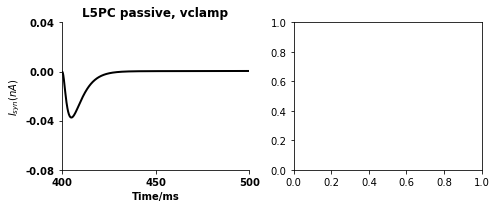

In [29]:
t0=t.to_python()
irec0 = irec.to_python()
t0_array = np.array(t0[4000:])
irec0_array = np.array(irec0[4000:])
fig, ax2 = plt.subplots(1,2, figsize = (7,3))
plot_curve(ax2[0],t0_array, irec0_array-irec0_array[0], color='black', title='L5PC passive, vclamp', xlim=[400,500], dx=50, ylim=[-0.08,0.04], dy=0.04, alpha = 1.0, xlabel='Time/ms', ylabel = r'$I_{syn} (nA)$', label='', ynum_decimals=2)
plt.tight_layout()

# plt.plot(t0_array, irec0_array-irec0_array[0])
result_lambdas, P = exp_fitting(t0_array,irec0_array-irec0_array[0], num=2)
print(-1./result_lambdas)

[4.2930417+1.460282j 4.2930417-1.460282j]


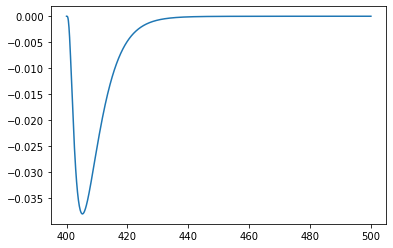

In [18]:
t0=t.to_python()
irec0 = irec.to_python()
# print(np.shape(t0))
t0_array = np.array(t0[4000:])
irec0_array = np.array(irec0[4000:])
plt.plot(t0_array, irec0_array-irec0_array[0])
result_lambdas, P = exp_fitting(t0_array,irec0_array-irec0_array[0], num=2)
print(-1./result_lambdas)

# Ih current during E synapse activation

In [20]:
L5PC = h.L5PCtemplate(morphologyFilename)
loc=L5PC.dend[58](0.9)

recv = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
v_syn = h.Vector().record(loc._ref_v)
# for sec in h.allsec():
    # sec.disconnect()
# h.topology()
# L5PC.dend[58].gIhbar_Ih = 0.
# sec=L5PC.dend[58]
t = h.Vector().record(h._ref_t)


# *********************************************************
# current at loc
Ileak_syn = h.Vector().record(loc.pas._ref_i)
IIh_syn = h.Vector().record(loc.Ih._ref_ihcn)


# *********************************************************
# current at soma
# Ileak = h.Vector().record(L5PC.soma[0](0.5).pas._ref_i)
# IIh = h.Vector().record(L5PC.soma[0](0.5).Ih._ref_ihcn)
# # mIh = h.Vector().record(L5PC.soma[0](0.5).Ih._ref_m)
# ICa_HVA = h.Vector().record(L5PC.soma[0](0.5).Ca_HVA._ref_ica)
# # ICa_LVAst = h.Vector().record(L5PC.soma[0](0.5).Ca_LVAst._ref_ica)
# # IIm = h.Vector().record(L5PC.soma[0](0.5).Im._ref_ik)
# IK_Pst = h.Vector().record(L5PC.soma[0](0.5).K_Pst._ref_ik)
# IK_Tst = h.Vector().record(L5PC.soma[0](0.5).K_Tst._ref_ik)
# INap_Et2 = h.Vector().record(L5PC.soma[0](0.5).Nap_Et2._ref_ina)
# INaTa_t = h.Vector().record(L5PC.soma[0](0.5).NaTa_t._ref_ina)
# # INaTs2_t = h.Vector().record(L5PC.soma[0](0.5).NaTs2_t._ref_ina)
# ISK_E2 = h.Vector().record(L5PC.soma[0](0.5).SK_E2._ref_ik)
# ISKv3_1 = h.Vector().record(L5PC.soma[0](0.5).SKv3_1._ref_ik)
# # mSKv3_1 = h.Vector().record(L5PC.soma[0](0.5).SKv3_1._ref_m)
# # Ikaprox = h.Vector().record(L5PC.soma[0](0.5).kaprox._ref_ik)
# # Ikadist = h.Vector().record(L5PC.soma[0](0.5).kadist._ref_ik)
# # Ikdrca1 = h.Vector().record(L5PC.soma[0](0.5).kdrca1._ref_ik)
# # Ina3 = h.Vector().record(L5PC.soma[0](0.5).na3._ref_ina)
# # Inax = h.Vector().record(L5PC.soma[0](0.5).nax._ref_ina)
# # Ih = h.Vector().record(L5PC.soma[0](0.5).h._ref_i)

# Set simulation parameters
h.dt = 0.1
h.tstop = 500
h.v_init = -77


# Initialize an excitatory or inhibitory synaptic input
# make a new stimulator
stim = h.NetStim()

# attach it to a synapse
syn = h.Exp2Syn(loc)
syn.tau1 = 1.  # ms
syn.tau2 = 5.  # ms
E=True
if E:
    syn.e = 0.  # mV for E input and -80 for I input
else: 
    syn.e = -80.
# print(syn.e)

i_syn = h.Vector()
i_syn.record(syn._ref_i)
    
stim.number = 1
stim.start = 400.  # ms
ncstim = h.NetCon(stim, syn)
ncstim.delay = 0.
ncstim.weight[0] = 1e-3  # uS


# Initialize voltage clamp
vclamp = h.SEClamp(loc)
vclamp.amp1 = -77.
vclamp.dur1 = h.tstop
vclamp.dur2 = h.tstop
vclamp.amp2 = -77. - 20

irec = h.Vector()
irec.record(vclamp._ref_i)

h.t = 0
h.finitialize(h.v_init)
h.fcurrent()
while h.t < h.tstop:
        h.fadvance()



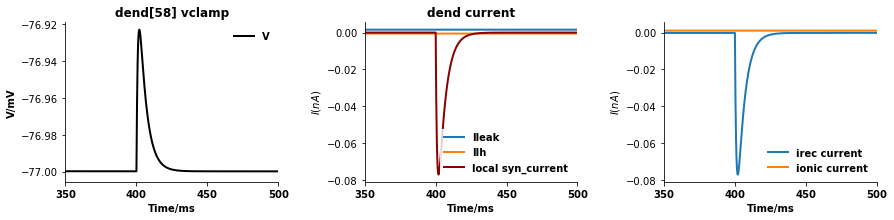

In [21]:
area_soma = L5PC.soma[0].diam*np.pi*L5PC.soma[0].L 
loc0=L5PC.dend[58]
area_syn = loc0.diam*np.pi*loc0.L
# name_soma=['Ileak','IIh','ICa_HVA','ICa_LVAst','IK_Pst','IK_Tst','INap_Et2','INaTa_t',
#       'ISK_E2','ISKv3_1']
# variables_soma = {
#     'Ileak': Ileak, 
#     'IIh': IIh,
#     'ICa_HVA': ICa_HVA,
#     'ICa_LVAst': ICa_LVAst,
#     'IK_Pst': IK_Pst,
#     'IK_Tst': IK_Tst,
#     'INap_Et2': INap_Et2,
#     'INaTa_t': INaTa_t,
#     'ISK_E2': ISK_E2,
#     'ISKv3_1': ISKv3_1
# }
name_syn=['Ileak','IIh']
variables_syn = {
    'Ileak': Ileak_syn, 
    'IIh': IIh_syn
}
fig, ax2 = plt.subplots(1,3, figsize = (12,3))
syn_current = irec.to_python()
syn_current = np.array(syn_current)
# syn_current = syn_current - syn_current[4000]
tol_ionic=np.zeros_like(syn_current)
for i in range(len(name_syn)):
    # title='fE =1e-3'+ name[i]
    name0=name_syn[i]
    y=variables_syn.get(name0)
    y=np.array(y.to_python())
    tol_ionic=tol_ionic+y*area_syn*1e-2
    # plot_curve(ax2[0], t, , color='black', title='', xlim=[350,500],dx=50,ylim=[],dy=0.,alpha = 1.0, xlabel='Time/ms', ylabel = 'V/mV', label='',ynum_decimals=2)
    plot_curve(ax2[1], t, y*area_syn*1e-2, color='', title='', xlim=[350,500], dx=50, ylim=[], dy=0, alpha = 1.0, xlabel='Time/ms', ylabel = r'$I (nA)$', label=name0)
    plt.tight_layout()
plot_curve(ax2[1], t, i_syn, color='darkred', title='dend current', xlim=[350,500], dx=50, ylim=[], dy=0, alpha = 1.0, xlabel='Time/ms', ylabel = r'$I (nA)$', label='local syn_current')
plot_curve(ax2[2], t, syn_current, color='', title='', xlim=[350,500], dx=50, ylim=[], dy=0, alpha = 1.0, xlabel='Time/ms', ylabel = r'$I (nA)$', label='irec current')
plot_curve(ax2[2], t, tol_ionic, color='', title='', xlim=[350,500], dx=50, ylim=[], dy=0.0, alpha = 1.0, xlabel='Time/ms', ylabel = r'$I (nA)$', label='ionic current', ynum_decimals=2)
plot_curve(ax2[0], t, v_syn, color='black', title='dend[58] vclamp', xlim=[350,500], dx=50, ylim=[], dy=0, alpha = 1.0, xlabel='Time/ms', ylabel = 'V/mV', label='V')


In [11]:
recv[-1]

-77.00054987585585

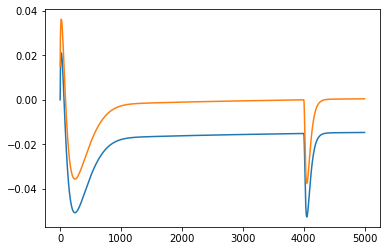

In [30]:
syn_current = irec.to_python()
syn_current = np.array(syn_current)
plt.plot(syn_current)
syn_current = syn_current - syn_current[4000]
plt.plot(syn_current)

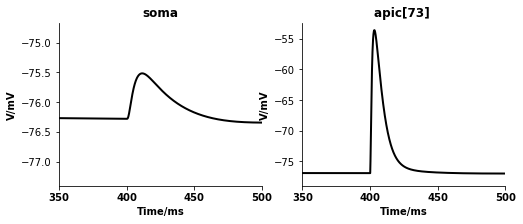

In [9]:
fig, ax2 = plt.subplots(1,2, figsize = (8,3))
plot_curve(ax2[0], t, recv, color='black', title='soma', xlim=[350,500],dx=50,ylim=[],dy=0.,alpha = 1.0, xlabel='Time/ms', ylabel = 'V/mV', label='',ynum_decimals=2)
# plot_curve(ax2[0], t, recv0_n, color='red', title='', xlim=[350,500],dx=50,ylim=[],dy=0.,alpha = 1.0, xlabel='Time/ms', ylabel = 'V/mV', label='',ynum_decimals=2)
plot_curve(ax2[1], t, v_syn, color='black', title='apic[73] ', xlim=[350,500],dx=50,ylim=[],dy=0.,alpha = 1.0, xlabel='Time/ms', ylabel = 'V/mV', label='',ynum_decimals=2)


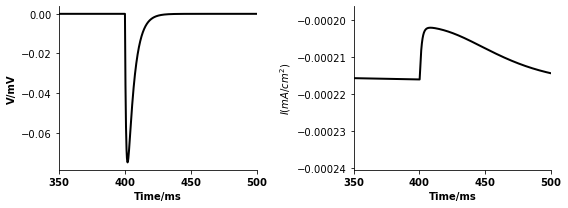

In [51]:
fig, ax2 = plt.subplots(1,2, figsize = (8,3))
plot_curve(ax2[0], t, irec, color='black', title='', xlim=[350,500],dx=50,ylim=[],dy=0.,alpha = 1.0, xlabel='Time/ms', ylabel = 'V/mV', label='',ynum_decimals=2)
plot_curve(ax2[1], t, IIh, color='black', title='', xlim=[350,500], dx=50, ylim=[], dy=0, alpha = 1.0, xlabel='Time/ms', ylabel = r'$I (mA/cm^2)$', label='')
plt.tight_layout()

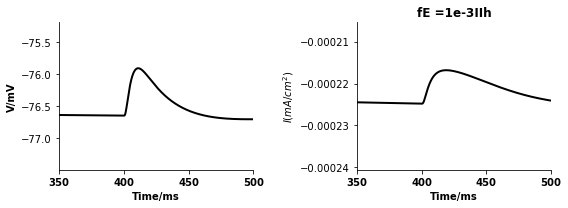

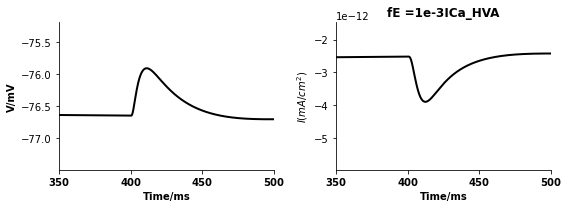

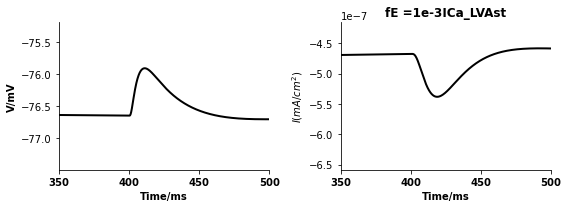

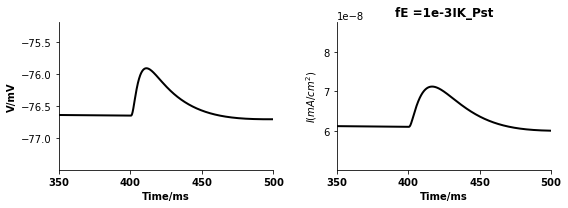

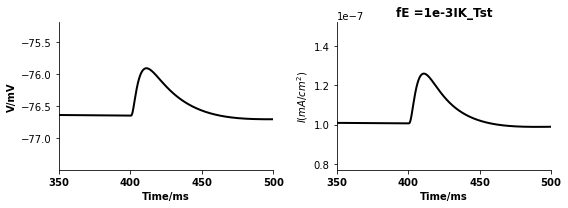

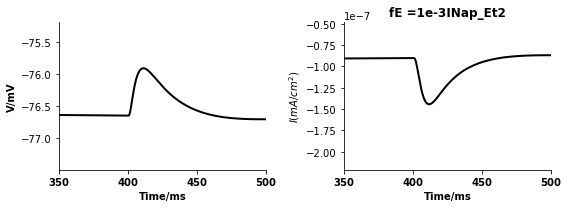

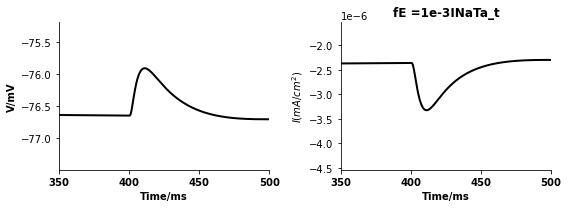

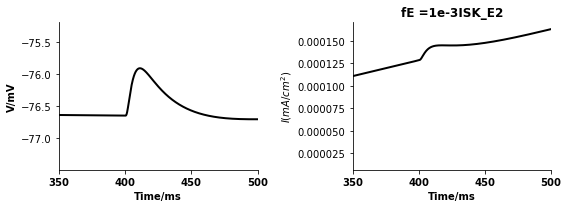

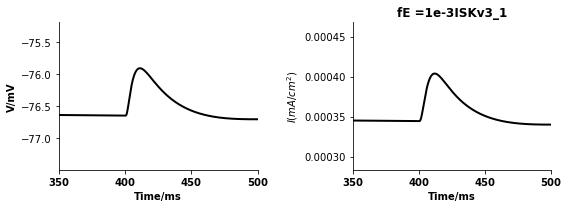

In [141]:

name=['IIh','ICa_HVA','ICa_LVAst','IK_Pst','IK_Tst','INap_Et2','INaTa_t',
      'ISK_E2','ISKv3_1']
variables = {
    'IIh': IIh,
    'ICa_HVA': ICa_HVA,
    'ICa_LVAst': ICa_LVAst,
    'IK_Pst': IK_Pst,
    'IK_Tst': IK_Tst,
    'INap_Et2': INap_Et2,
    'INaTa_t': INaTa_t,
    'ISK_E2': ISK_E2,
    'ISKv3_1': ISKv3_1
}

for i in range(len(name)):
    title='fE =1e-3'+ name[i]
    name0=name[i]
    y=variables.get(name0)
    fig, ax2 = plt.subplots(1,2, figsize = (8,3))
    plot_curve(ax2[0], t, recv, color='black', title='', xlim=[350,500],dx=50,ylim=[],dy=0.,alpha = 1.0, xlabel='Time/ms', ylabel = 'V/mV', label='',ynum_decimals=2)
    plot_curve(ax2[1], t, y, color='black', title=title, xlim=[350,500], dx=50, ylim=[], dy=0, alpha = 1.0, xlabel='Time/ms', ylabel = r'$I (mA/cm^2)$', label='')
    plt.tight_layout()

# SKv3_1

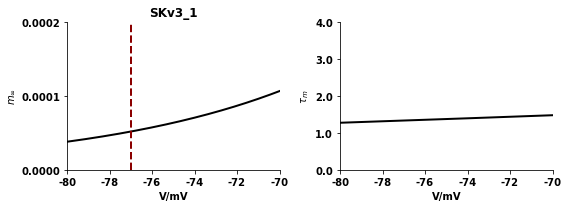

In [94]:
v=np.linspace(-80,-70,1000)
mInf =  1/(1+np.exp(((v -(18.700))/(-9.700))))
mTau =  0.2*20.000/(1+np.exp(((v -(-46.560))/(-44.140))))


fig, ax2 = plt.subplots(1,2, figsize = (8,3))
plot_curve(ax2[0], v, mInf, color='black', title='SKv3_1', xlim=[-80,-70],dx=2,ylim=[0,0.0002],dy=0.0001,alpha = 1.0, xlabel='V/mV', ylabel = r'$m_{\infty}$', label='',ynum_decimals=4)
plot_curve(ax2[1], v, mTau, color='black', title='', xlim=[-80,-70], dx=2, ylim=[0,4], dy=1, alpha = 1.0, xlabel='V/mV', ylabel = r'$\tau_m$', label='')
ax2[0].axvline(x=-77, color='darkred', linestyle='--', linewidth=2)
plt.tight_layout()

In [91]:
np.max( mInf)

0.00010681238059392484

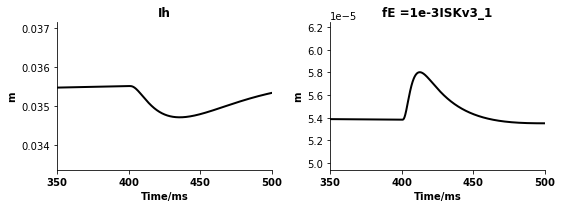

In [106]:
fig, ax2 = plt.subplots(1,2, figsize = (8,3))
plot_curve(ax2[0], t, mIh, color='black', title='Ih', xlim=[350,500],dx=50,ylim=[],dy=0.,alpha = 1.0, xlabel='Time/ms', ylabel = 'm', label='',ynum_decimals=2)
plot_curve(ax2[1], t, mSKv3_1, color='black', title=title, xlim=[350,500], dx=50, ylim=[], dy=0, alpha = 1.0, xlabel='Time/ms', ylabel = 'm', label='')
plt.tight_layout()

In [120]:
estimated_lambdas = np.loadtxt("estimated_lambdas_active_tauh1_fE.txt")
ground_truth = np.array([-1., -0.2])
relative_error = np.abs((estimated_lambdas-ground_truth)/ground_truth)
print(relative_error)

[[8.04383823e-01 2.19191170e-02]
 [8.04012728e-01 2.00636417e-02]
 [8.03576519e-01 1.78825953e-02]
 [8.03080829e-01 1.54041451e-02]
 [8.02531029e-01 1.26551438e-02]
 [8.01932219e-01 9.66109605e-03]
 [8.01289230e-01 6.44614963e-03]
 [8.00606621e-01 3.03310518e-03]
 [7.99888688e-01 5.56559575e-04]
 [7.99139469e-01 4.30265488e-03]
 [7.98362753e-01 8.18623563e-03]
 [7.97562089e-01 1.21895528e-02]
 [7.96740800e-01 1.62960009e-02]
 [7.95901987e-01 2.04900636e-02]
 [7.95048548e-01 2.47572579e-02]
 [7.94183184e-01 2.90840792e-02]
 [7.93308411e-01 3.34579464e-02]
 [7.92426570e-01 3.78671485e-02]
 [7.91539841e-01 4.23007936e-02]
 [7.90650248e-01 4.67487587e-02]
 [7.89759671e-01 5.12016426e-02]
 [7.88869856e-01 5.56507212e-02]
 [7.87982419e-01 6.00879042e-02]
 [7.87098861e-01 6.45056952e-02]
 [7.86220569e-01 6.88971536e-02]
 [7.85348828e-01 7.32558589e-02]
 [7.84484825e-01 7.75758769e-02]
 [7.83629654e-01 8.18517283e-02]
 [7.82784328e-01 8.60783597e-02]
 [7.81949777e-01 9.02511153e-02]
 [7.811268

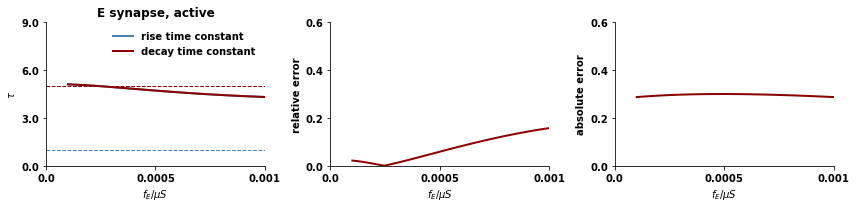

In [121]:
estimated_lambdas = np.loadtxt("estimated_lambdas_active_tauh1_fE.txt")
ground_truth = np.array([-1., -0.2])
relative_error = np.abs((estimated_lambdas-ground_truth)/ground_truth)
# estimated_lambdas = np.loadtxt("estimated_lambdas_active_tauh1_fE.txt")
# relative_error = np.loadtxt("relative_error_active_tauh1_fE.txt")
absolute_error = np.loadtxt("absolute_error_active_tauh1_fE.txt")

fE = np.linspace(1e-4, 1e-3, 50)
fig, ax2 = plt.subplots(1,3, figsize = (12,3))
plot_curve(ax2[0], fE, -1./estimated_lambdas[:,0], color='steelblue', title='E synapse, active', xlim=[0,1e-3],ylim=[0,9],alpha = 1.0, xlabel=r'$f_{E}/\mu S$', ylabel = r'$\tau$', label='rise time constant')
plot_curve(ax2[0], fE, -1./estimated_lambdas[:,1], color='darkred', title='', xlim=[0,1e-3], dx=5e-4, ylim=[0,9], dy=3, alpha = 1.0, xlabel=r'$f_{E}/\mu S$', ylabel = r'$\tau$', label='decay time constant')
ax2[0].axhline(y=1, color='steelblue', linestyle='--', linewidth=1)
ax2[0].axhline(y=5, color='darkred', linestyle='--', linewidth=1)
plot_curve(ax2[1], fE, relative_error[:,0], color='steelblue', title='', xlim=[0,1e-3],ylim=[0,0.9],alpha = 1.0, xlabel=r'$f_{E}/\mu S$', ylabel = 'relative error', label='')
plot_curve(ax2[1], fE, relative_error[:,1], color='darkred', title='', xlim=[0,1e-3], dx=5e-4, ylim=[0,0.6], dy=0.2, alpha = 1.0, xlabel=r'$f_{E}/\mu S$', ylabel = 'relative error', label='')
plot_curve(ax2[2], fE, absolute_error[:,0], color='steelblue', title='', xlim=[0,1e-3],ylim=[0,0.9],alpha = 1.0, xlabel=r'$f_{E}/\mu S$', ylabel = 'absolute error', label='')
plot_curve(ax2[2], fE, absolute_error[:,1], color='darkred', title='', xlim=[0,1e-3], dx=5e-4, ylim=[0,0.6], dy=0.2, alpha = 1.0, xlabel=r'$f_{E}/\mu S$', ylabel ='absolute error', label='')
plt.tight_layout()



In [127]:
a=np.array([1,2,3])
b=np.array([4,5,6])
a/b

array([0.25, 0.4 , 0.5 ])

In [125]:
relative_error = np.loadtxt("relative_error_active_tauh1_fE.txt")
print(relative_error[:,0])

[0.85422919 0.85431928 0.85432356 0.85424732 0.8540957  0.85387366
 0.85358593 0.85323709 0.85283148 0.85237326 0.85186636 0.85131456
 0.85072141 0.8500903  0.84942443 0.84872683 0.84800038 0.84724779
 0.84647164 0.84567435 0.84485821 0.84402541 0.84317798 0.84231787
 0.84144691 0.84056681 0.83967923 0.83878569 0.83788766 0.8369865
 0.83608352 0.83517995 0.83427693 0.83337555 0.83247686 0.83158181
 0.83069132 0.82980626 0.82892743 0.8280556  0.82719149 0.82633577
 0.82548908 0.82465202 0.82382514 0.82300897 0.822204   0.82141069
 0.82062946 0.81986072]


# loction of SKv3_1

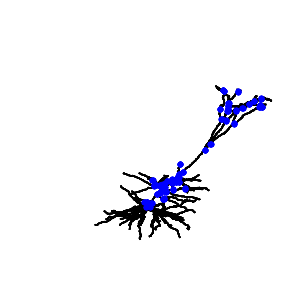

['L5PCtemplate[0].soma[0]', 'L5PCtemplate[0].apic[0]', 'L5PCtemplate[0].apic[1]', 'L5PCtemplate[0].apic[2]', 'L5PCtemplate[0].apic[3]', 'L5PCtemplate[0].apic[4]', 'L5PCtemplate[0].apic[5]', 'L5PCtemplate[0].apic[6]', 'L5PCtemplate[0].apic[7]', 'L5PCtemplate[0].apic[8]', 'L5PCtemplate[0].apic[9]', 'L5PCtemplate[0].apic[10]', 'L5PCtemplate[0].apic[11]', 'L5PCtemplate[0].apic[12]', 'L5PCtemplate[0].apic[13]', 'L5PCtemplate[0].apic[14]', 'L5PCtemplate[0].apic[15]', 'L5PCtemplate[0].apic[16]', 'L5PCtemplate[0].apic[17]', 'L5PCtemplate[0].apic[18]', 'L5PCtemplate[0].apic[19]', 'L5PCtemplate[0].apic[20]', 'L5PCtemplate[0].apic[21]', 'L5PCtemplate[0].apic[22]', 'L5PCtemplate[0].apic[23]', 'L5PCtemplate[0].apic[24]', 'L5PCtemplate[0].apic[25]', 'L5PCtemplate[0].apic[26]', 'L5PCtemplate[0].apic[27]', 'L5PCtemplate[0].apic[28]', 'L5PCtemplate[0].apic[29]', 'L5PCtemplate[0].apic[30]', 'L5PCtemplate[0].apic[31]', 'L5PCtemplate[0].apic[32]', 'L5PCtemplate[0].apic[33]', 'L5PCtemplate[0].apic[34]', 'L

In [83]:
# from neuron import h
from matplotlib import pyplot, cm

L5PC = h.L5PCtemplate(morphologyFilename)
ps = h.PlotShape(True)
ax = ps.plot(pyplot)
# 将神经元图的线条颜色更改为黑色
for line in ax.lines:
    line.set_color('black')

ax.scatter([(L5PC.soma[0].x3d(0)+L5PC.soma[0].x3d(1))/2], [(L5PC.soma[0].y3d(0)+L5PC.soma[0].y3d(1))/2],[(L5PC.soma[0].z3d(0)+L5PC.soma[0].z3d(1))/2], 
            color='red', s=20, marker='o', label='soma')


location_SKv3_1 = [] 
for sec in h.allsec():
    # 检查 section 是否有SKv3_1
    if h.ismembrane("SKv3_1",sec=sec):
        # 在原点标记一个点
        ax.scatter([(sec.x3d(0)+sec.x3d(1))/2], [(sec.y3d(0)+sec.y3d(1))/2],[(sec.z3d(0)+sec.z3d(1))/2], 
                   color='blue', s=20, marker='o', label='SKv3_1')

        location_SKv3_1.append(sec.name())  
# 设置坐标轴范围
ax.set_xlim([-700, 0])  # 替换 xmin 和 xmax 为所需的 x 范围
ax.set_ylim([500, 1400])  # 替换 ymin 和 ymax 为所需的 y 范围
ax.set_zlim([-1000, 00])  # 替换 zmin 和 zmax 为所需的 z 范围
# 关闭网格
ax.grid(False)
# 关闭坐标轴
ax.axis('off')
pyplot.show()
print(location_SKv3_1)

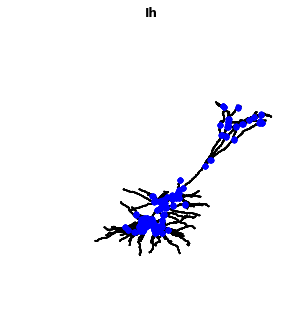

['L5PCtemplate[0].soma[0]', 'L5PCtemplate[0].dend[0]', 'L5PCtemplate[0].dend[1]', 'L5PCtemplate[0].dend[2]', 'L5PCtemplate[0].dend[3]', 'L5PCtemplate[0].dend[4]', 'L5PCtemplate[0].dend[5]', 'L5PCtemplate[0].dend[6]', 'L5PCtemplate[0].dend[7]', 'L5PCtemplate[0].dend[8]', 'L5PCtemplate[0].dend[9]', 'L5PCtemplate[0].dend[10]', 'L5PCtemplate[0].dend[11]', 'L5PCtemplate[0].dend[12]', 'L5PCtemplate[0].dend[13]', 'L5PCtemplate[0].dend[14]', 'L5PCtemplate[0].dend[15]', 'L5PCtemplate[0].dend[16]', 'L5PCtemplate[0].dend[17]', 'L5PCtemplate[0].dend[18]', 'L5PCtemplate[0].dend[19]', 'L5PCtemplate[0].dend[20]', 'L5PCtemplate[0].dend[21]', 'L5PCtemplate[0].dend[22]', 'L5PCtemplate[0].dend[23]', 'L5PCtemplate[0].dend[24]', 'L5PCtemplate[0].dend[25]', 'L5PCtemplate[0].dend[26]', 'L5PCtemplate[0].dend[27]', 'L5PCtemplate[0].dend[28]', 'L5PCtemplate[0].dend[29]', 'L5PCtemplate[0].dend[30]', 'L5PCtemplate[0].dend[31]', 'L5PCtemplate[0].dend[32]', 'L5PCtemplate[0].dend[33]', 'L5PCtemplate[0].dend[34]', 'L

In [90]:
# from neuron import h
from matplotlib import pyplot, cm

L5PC = h.L5PCtemplate(morphologyFilename)
ps = h.PlotShape(True)
ax = ps.plot(pyplot)
# 将神经元图的线条颜色更改为黑色
for line in ax.lines:
    line.set_color('black')

ax.scatter([(L5PC.soma[0].x3d(0)+L5PC.soma[0].x3d(1))/2], [(L5PC.soma[0].y3d(0)+L5PC.soma[0].y3d(1))/2],[(L5PC.soma[0].z3d(0)+L5PC.soma[0].z3d(1))/2], 
            color='red', s=20, marker='o', label='soma')


location_SKv3_1 = [] 
for sec in h.allsec():
    # 检查 section 是否有SKv3_1
    if h.ismembrane("Ih",sec=sec):
        # 在原点标记一个点
        ax.scatter([(sec.x3d(0)+sec.x3d(1))/2], [(sec.y3d(0)+sec.y3d(1))/2],[(sec.z3d(0)+sec.z3d(1))/2], 
                   color='blue', s=20, marker='o', label='Ih')

        location_SKv3_1.append(sec.name())  
# 设置坐标轴范围
ax.set_xlim([-700, 0])  # 替换 xmin 和 xmax 为所需的 x 范围
ax.set_ylim([500, 1400])  # 替换 ymin 和 ymax 为所需的 y 范围
ax.set_zlim([-1000, 00])  # 替换 zmin 和 zmax 为所需的 z 范围
ax.set_title('Ih',fontsize=12,weight='bold')
# 关闭网格
ax.grid(False)
# 关闭坐标轴
ax.axis('off')
pyplot.show()
print(location_SKv3_1)

# ionic current component

In [2]:
L5PC = h.L5PCtemplate(morphologyFilename)
# Set simulation parameters
h.dt = 0.1
h.tstop = 200.
h.v_init = -77.
v_clamp = -77. 
# Initialize an excitatory or inhibitory synaptic input
# make a new stimulator
stim = h.NetStim()



# record ionic current
IIh = h.Vector().record(L5PC.soma[0](0.5).Ih._ref_ihcn)
ICa_HVA = h.Vector().record(L5PC.soma[0](0.5).Ca_HVA._ref_ica)
ICa_LVAst = h.Vector().record(L5PC.soma[0](0.5).Ca_LVAst._ref_ica)
# IIm = h.Vector().record(L5PC.soma[0](0.5).Im._ref_ik)
IK_Pst = h.Vector().record(L5PC.soma[0](0.5).K_Pst._ref_ik)
IK_Tst = h.Vector().record(L5PC.soma[0](0.5).K_Tst._ref_ik)
INap_Et2 = h.Vector().record(L5PC.soma[0](0.5).Nap_Et2._ref_ina)
INaTa_t = h.Vector().record(L5PC.soma[0](0.5).NaTa_t._ref_ina)
# INaTs2_t = h.Vector().record(L5PC.soma[0](0.5).NaTs2_t._ref_ina)
ISK_E2 = h.Vector().record(L5PC.soma[0](0.5).SK_E2._ref_ik)
ISKv3_1 = h.Vector().record(L5PC.soma[0](0.5).SKv3_1._ref_ik)
# mSKv3_1 = h.Vector().record(L5PC.soma[0](0.5).SKv3_1._ref_m)
# Ikaprox = h.Vector().record(L5PC.soma[0](0.5).kaprox._ref_ik)
# Ikadist = h.Vector().record(L5PC.soma[0](0.5).kadist._ref_ik)
# Ikdrca1 = h.Vector().record(L5PC.soma[0](0.5).kdrca1._ref_ik)
# Ina3 = h.Vector().record(L5PC.soma[0](0.5).na3._ref_ina)
# Inax = h.Vector().record(L5PC.soma[0](0.5).nax._ref_ina)
# Ih = h.Vector().record(L5PC.soma[0](0.5).h._ref_i)


loc=58
E=True
# attach it to a synapse
syn = h.Exp2Syn(L5PC.dend[int(loc)](0.9))
syn.tau1 = 1.  # ms
syn.tau2 = 5.  # ms
if E:
    syn.e = 0.  # mV for E input and -80 for I input
else: 
    syn.e = -80.
# print(syn.e)
    
stim.number = 1
stim.start = 1.  # ms
ncstim = h.NetCon(stim, syn)
ncstim.delay = 0.
ncstim.weight[0] = 1e-3  # uS


# Initialize voltage clamp
vclamp = h.SEClamp(L5PC.soma[0](0.5))
vclamp.amp1 = v_clamp
vclamp.dur1 = h.tstop
vclamp.dur2 = h.tstop
vclamp.amp2 = v_clamp - 20

irec = h.Vector()
irec.record(vclamp._ref_i)

# Function to initialize the simulation

h.t = 0
h.finitialize(h.v_init)
h.fcurrent()
while h.t < h.tstop:
    h.fadvance()
t=h.Vector().record(h._ref_t)


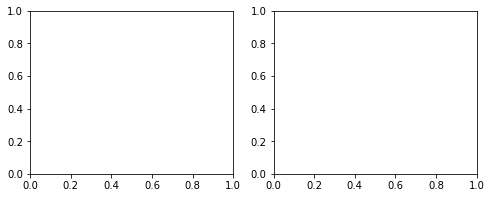

In [4]:

name=['IIh','ICa_HVA','ICa_LVAst','IK_Pst','IK_Tst','INap_Et2','INaTa_t',
      'ISK_E2','ISKv3_1']
variables = {
    'IIh': IIh,
    'ICa_HVA': ICa_HVA,
    'ICa_LVAst': ICa_LVAst,
    'IK_Pst': IK_Pst,
    'IK_Tst': IK_Tst,
    'INap_Et2': INap_Et2,
    'INaTa_t': INaTa_t,
    'ISK_E2': ISK_E2,
    'ISKv3_1': ISKv3_1
}
fig, ax2 = plt.subplots(1,2, figsize = (8,3))
for i in range(len(name)):
    # title='fE =1e-3'+ name[i]
    name0=name[i]
    y=variables.get(name0)
    # plot_curve(ax2[0], t, , color='black', title='', xlim=[350,500],dx=50,ylim=[],dy=0.,alpha = 1.0, xlabel='Time/ms', ylabel = 'V/mV', label='',ynum_decimals=2)
    plot_curve(ax2[0], t, y, color='', title='', xlim=[350,500], dx=50, ylim=[], dy=0, alpha = 1.0, xlabel='Time/ms', ylabel = r'$I (mA/cm^2)$', label=name0)
    plt.tight_layout()